<a href="https://colab.research.google.com/github/mounishvatti/pothole_detection_yolov8/blob/main/PotholeDetectionUsingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
!nvidia-smi

Wed Oct  2 19:44:55 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| 28%   47C    P8             21W /  125W |     484MiB /   6144MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
HOME = os.getcwd()

In [6]:
print(HOME)

C:\Users\SBA\yolov8


In [7]:
!pip install ultralytics

In [7]:
import ultralytics

In [8]:
ultralytics.checks()

Ultralytics 8.3.3  Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
Setup complete  (20 CPUs, 15.8 GB RAM, 126.5/461.7 GB disk)


In [10]:
import os
os.makedirs(os.path.join(HOME, 'datasets'),exist_ok=True)

In [11]:
%cd {HOME}/datasets

C:\Users\SBA\yolov8\datasets


C:\Users\SBA\miniconda3\envs\yolov8\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
!pip install roboflow

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="BGxmmlJv0p0Frg1j0zfA")
project = rf.workspace("hiteshram").project("object-detection-bounding-box-ftfs5")
version = project.version(1)
dataset = version.download("yolov8")                

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.3, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Object-Detection-(Bounding-Box)-1 in yolov8:: 100%|█| 800/800 [00:00<00:00, 2301.22it


In [15]:
!pip install fastapi kaleido python_multipart uvicorn

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ------------ --------------------------- 21.2/65.9 MB 111.6 MB/s eta 0:00:01
   ---------------- ----------------------- 27.5/65.9 MB 67.0 MB/s eta 0:00:01
   ------------------- -------------------- 31.5/65.9 MB 49.9 MB/s eta 0:00:01
   ------------------------------- -------- 51.6/65.9 MB 62.1 MB/s eta 0:00:01
   ---------------------------------- ----- 56.4/65.9 MB 55.2 MB/s eta 0:00:01
   ---------------------------------------  65.8/65.9 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------  65.8/65.9 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------  65.8/65.9 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------  65.8/65.9 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------  65.8/65.9 MB 57.4 MB/s eta 0:00:01
   ---------------------------------------- 65.9/65.9 MB 31.4 MB/s eta 0:00:0

In [23]:
import shutil

srcPath = 'datasets/Object-Detection-(Bounding-Box)-1'
dstPath = 'datasets/objectDetection'
shutil.move(os.path.join(HOME, srcPath), os.path.join(HOME, dstPath))

'C:\\Users\\SBA\\yolov8\\datasets/objectDetection'

In [ ]:
# names:
# - Potholes
# nc: 1
# roboflow:
#   license: CC BY 4.0
#   project: object-detection-bounding-box-ftfs5
#   url: https://universe.roboflow.com/hiteshram/object-detection-bounding-box-ftfs5/dataset/1
#   version: 1
#   workspace: hiteshram
# test: ../test/images
# train: ObjectDetection/train/images
# val: ObjectDetection/valid/images

In [1]:
import torch, os

HOME = os.getcwd()
%cd {HOME}
dstPath = 'datasets/objectDetection'
yamlPath = os.path.join(HOME, dstPath,'data.yaml')
print(yamlPath)

torch.backends.cudnn.enabled = False

C:\Users\SBA\yolov8
C:\Users\SBA\yolov8\datasets/objectDetection\data.yaml


C:\Users\SBA\miniconda3\envs\yolov8\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolo11n.pt")  # build a new model from scratch
# Train the model
model.train(data=yamlPath, epochs=50, imgsz=640)

Ultralytics 8.3.3  Python-3.10.14 torch-2.4.1 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\Users\SBA\yolov8\datasets/objectDetection\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning C:\Users\SBA\yolov8\datasets\objectDetection\train\labels.cache... 354 images, 0 backgrounds, 0 corrupt
val: Scanning C:\Users\SBA\yolov8\datasets\objectDetection\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 1


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.51G       1.96      2.832      2.008         29        640: 100%|██████████| 23/23 [00:22<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         20         98     0.0123      0.755     0.0249    0.00697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.59G       1.66      2.405      1.799         16        640: 100%|██████████| 23/23 [00:21<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         20         98     0.0714      0.224      0.112      0.034



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G      1.706      2.177       1.87         23        640: 100%|██████████| 23/23 [00:21<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         20         98     0.0568     0.0816      0.035    0.00957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/23 [00:00<?, ?it/s]

In [ ]:
#!yolo task=detect mode=train model=yolo11n.pt data={yamlPath} epochs=70 imgsz=640

In [ ]:
!ls {HOME}//runs/detect/train

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch300.jpg
confusion_matrix.png				    R_curve.png       train_batch301.jpg
events.out.tfevents.1698694063.5b4e6bf2fb2f.3488.0  results.csv       train_batch302.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


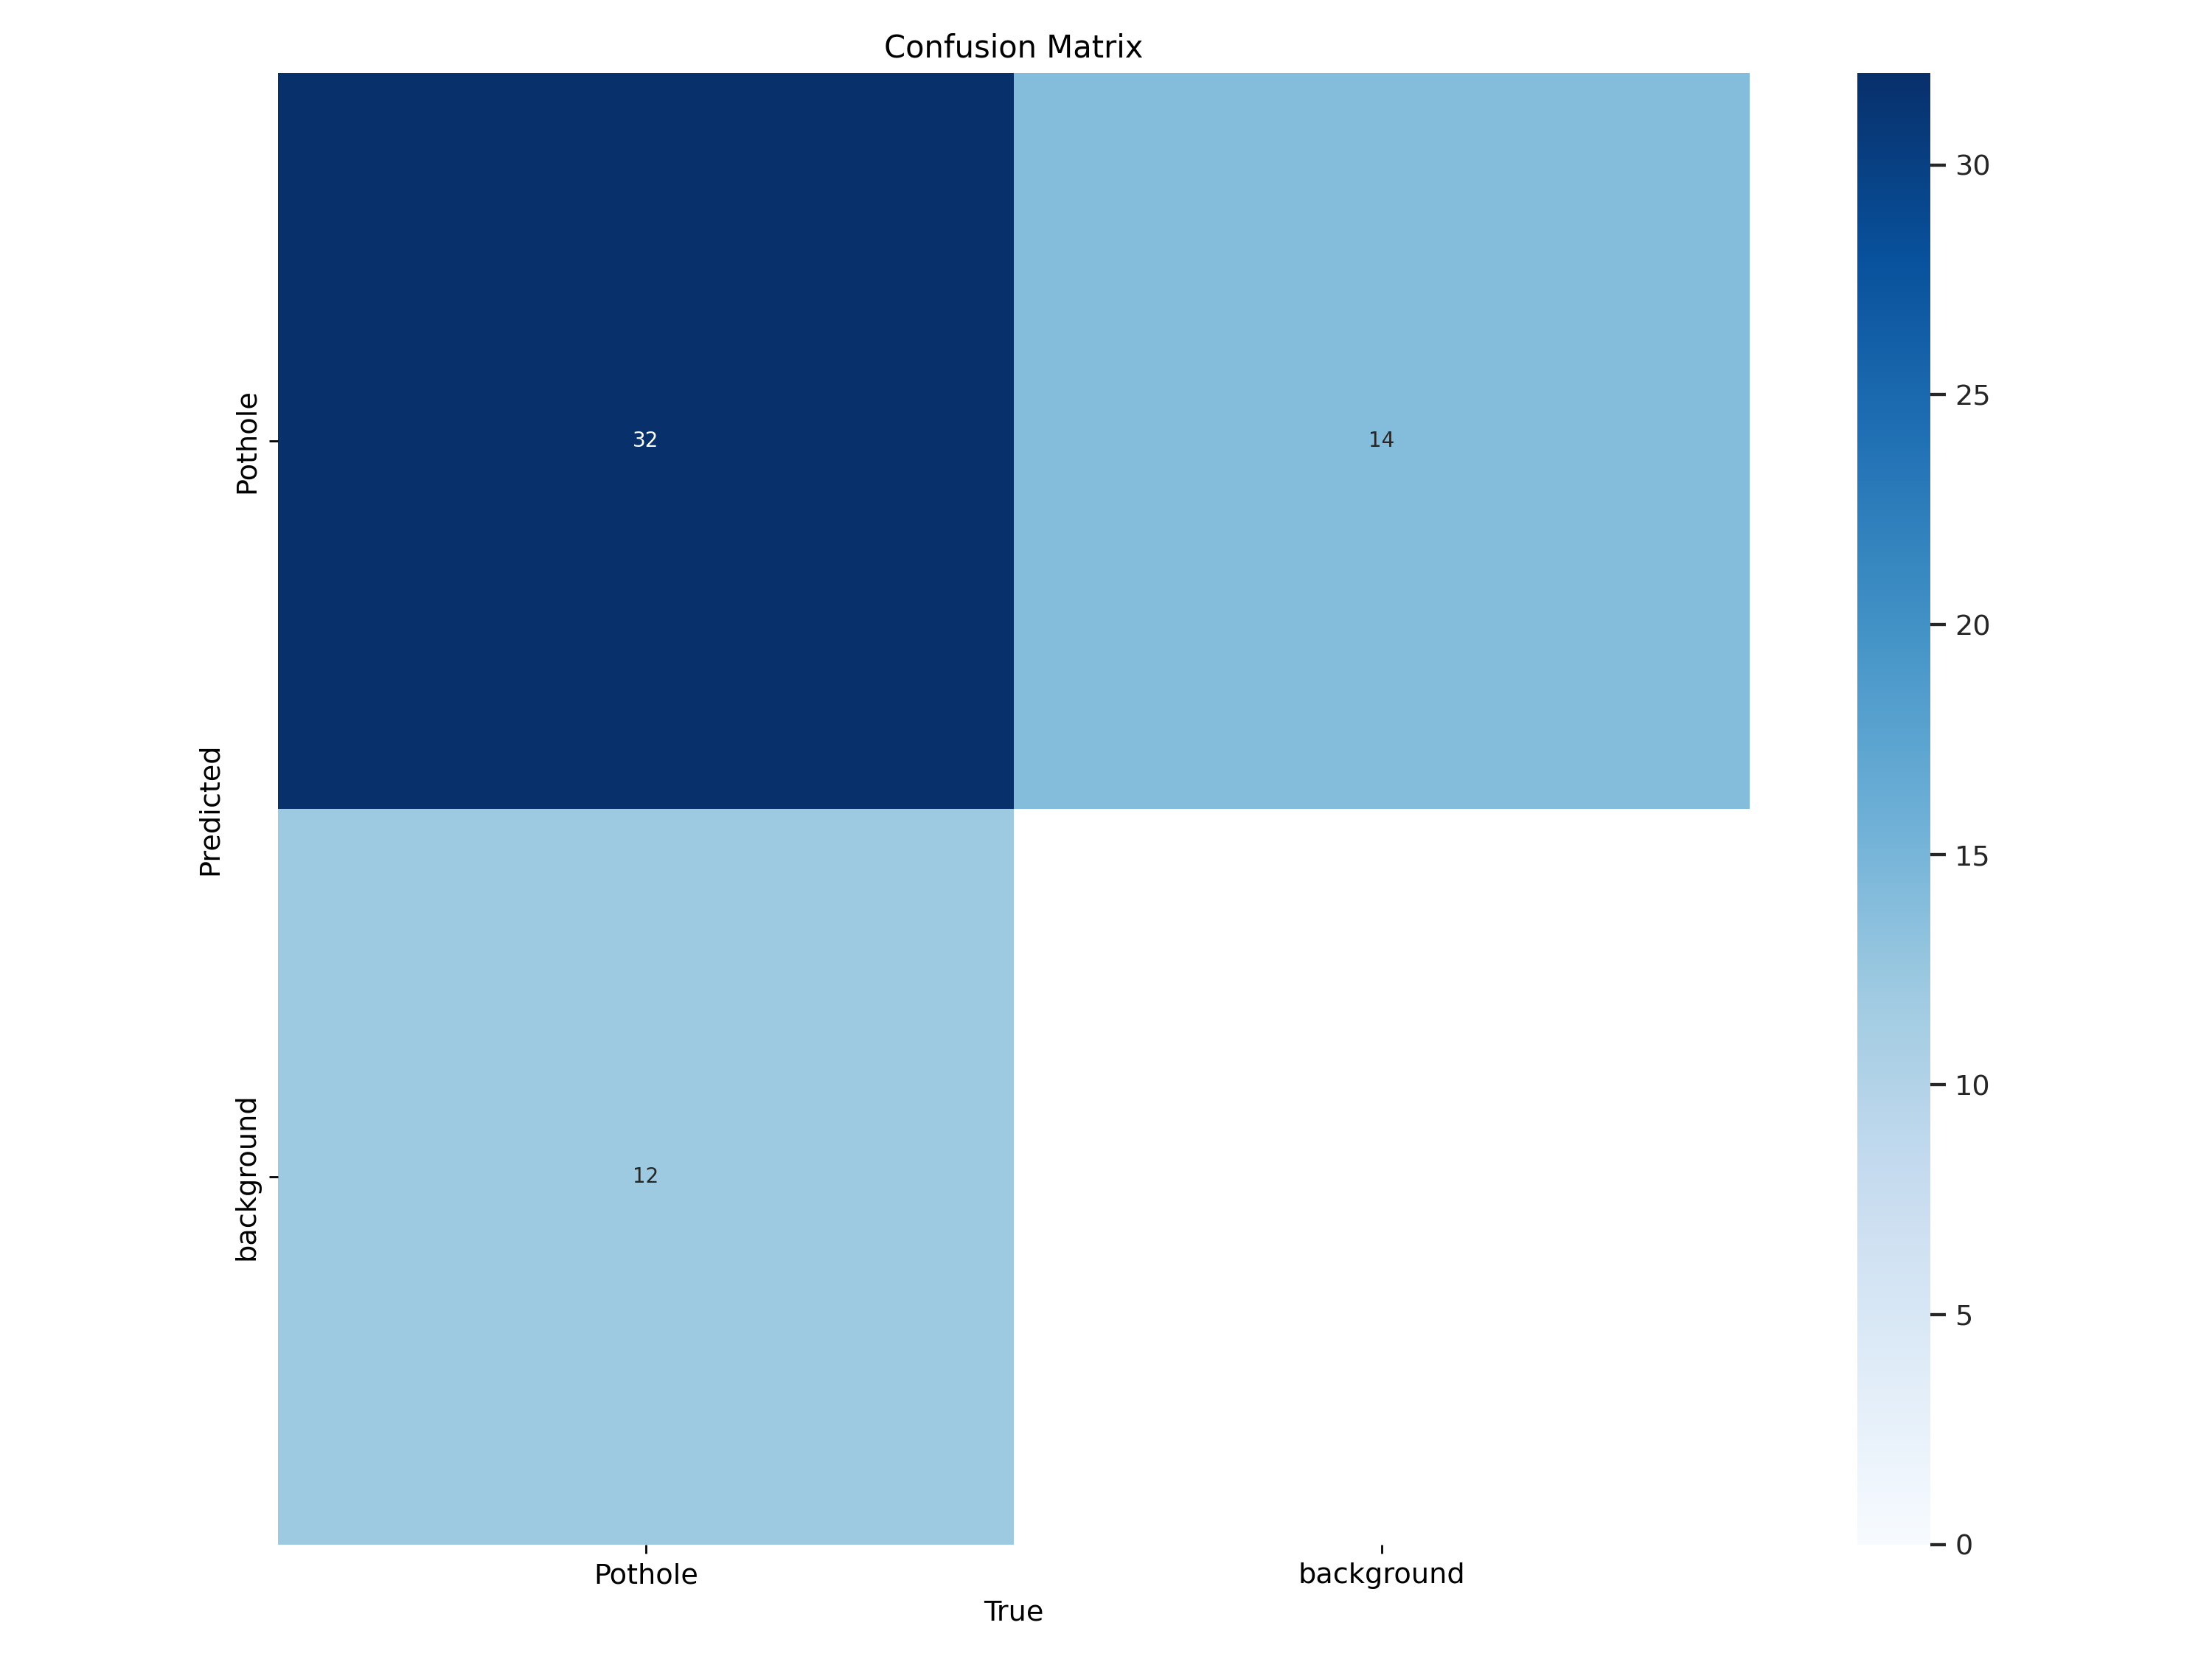

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/confusion_matrix.png', width = 900)

/content


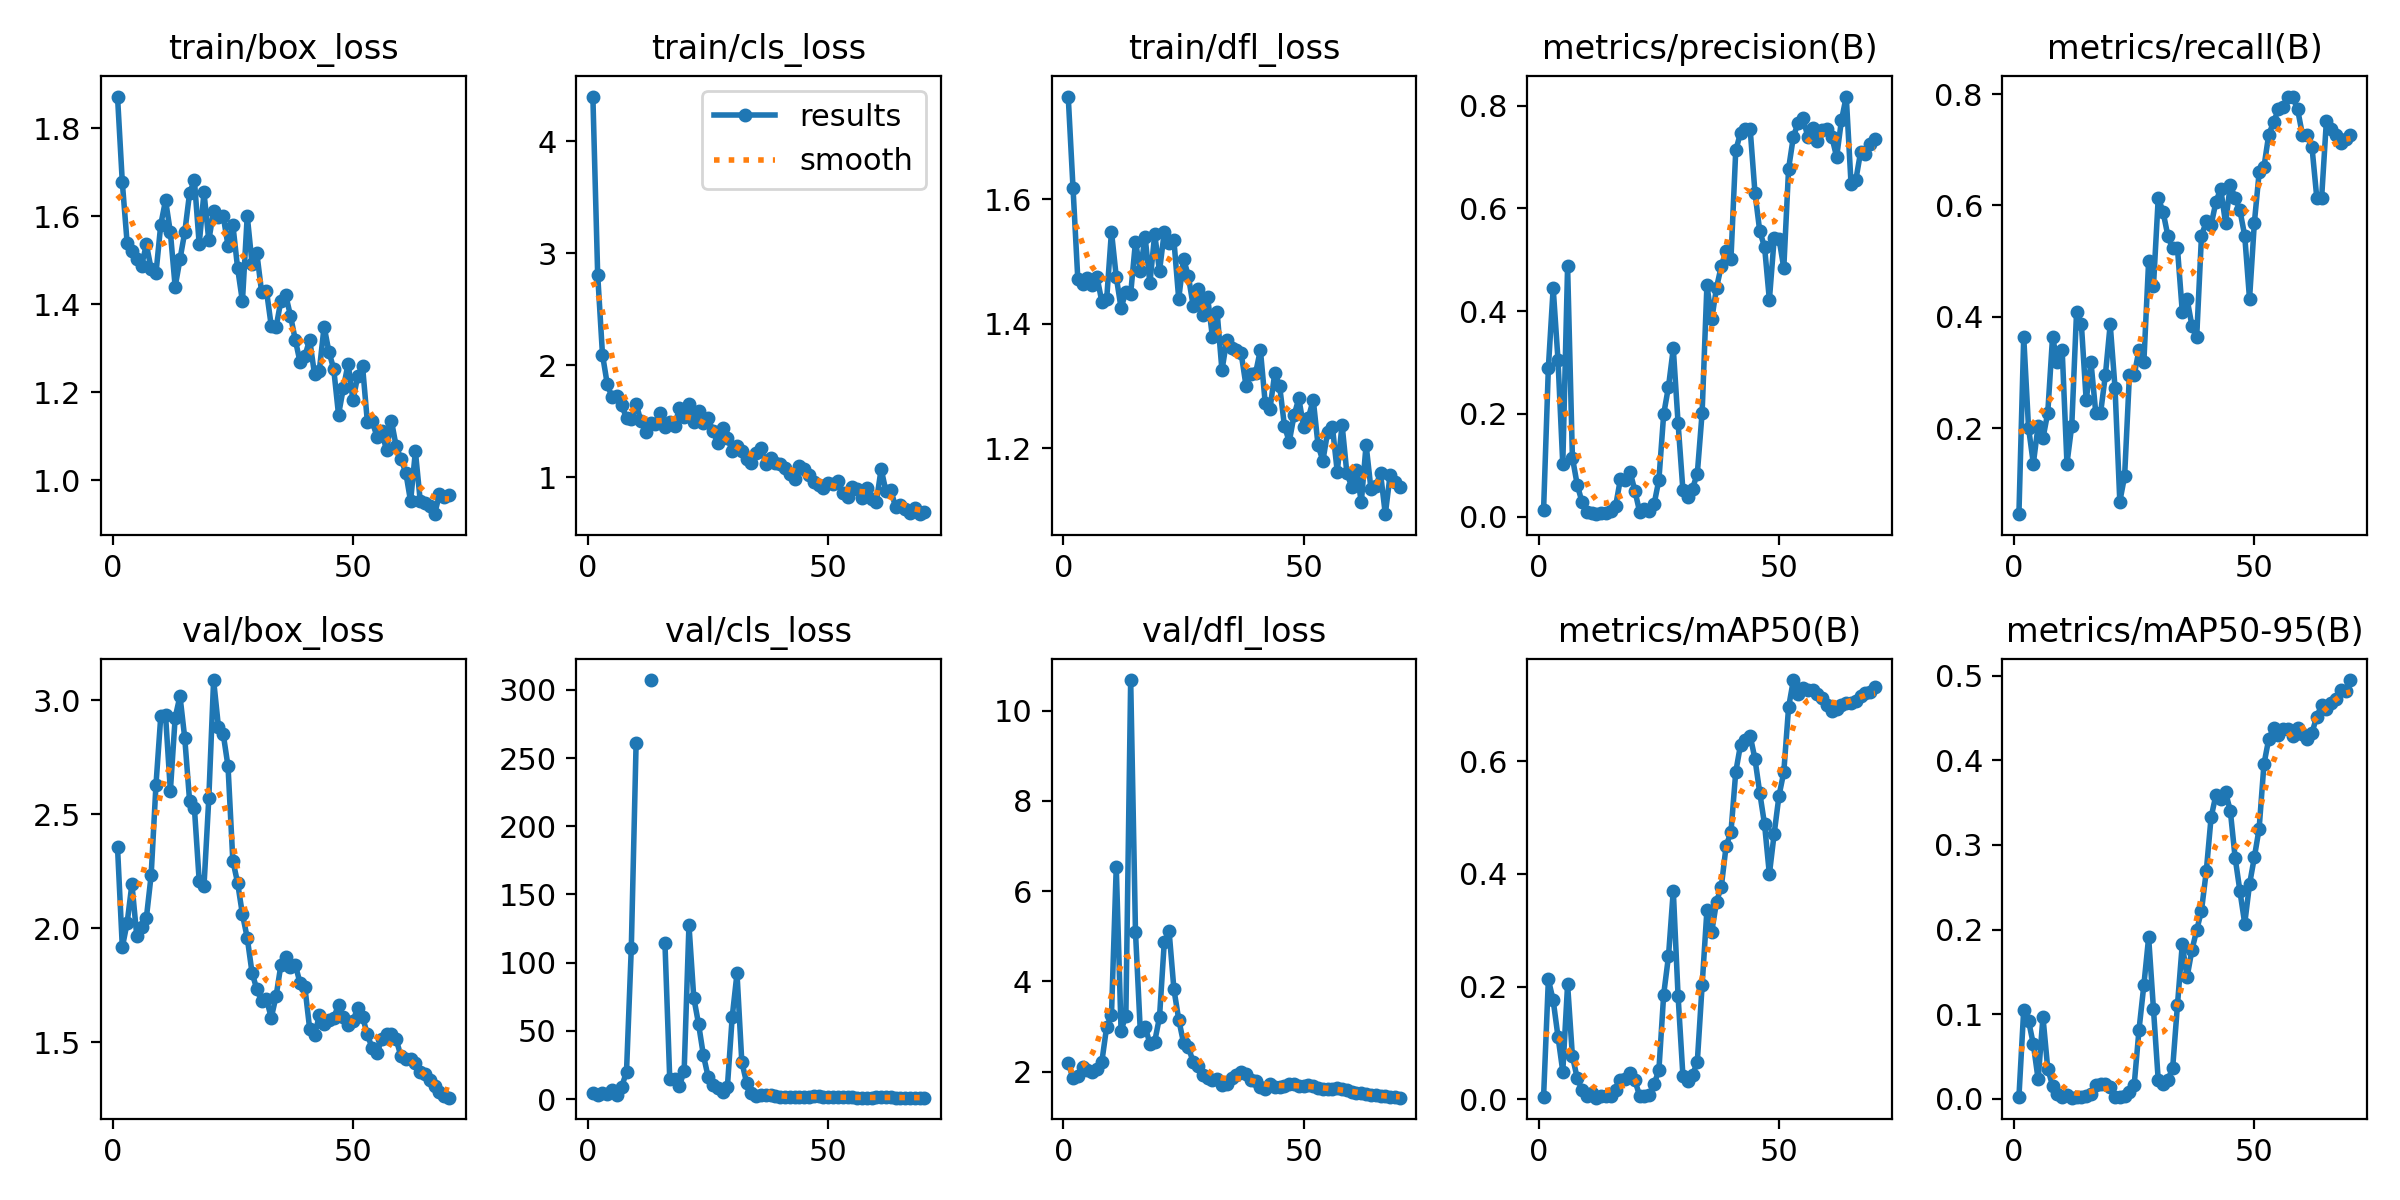

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/results.png', width = 600)

/content


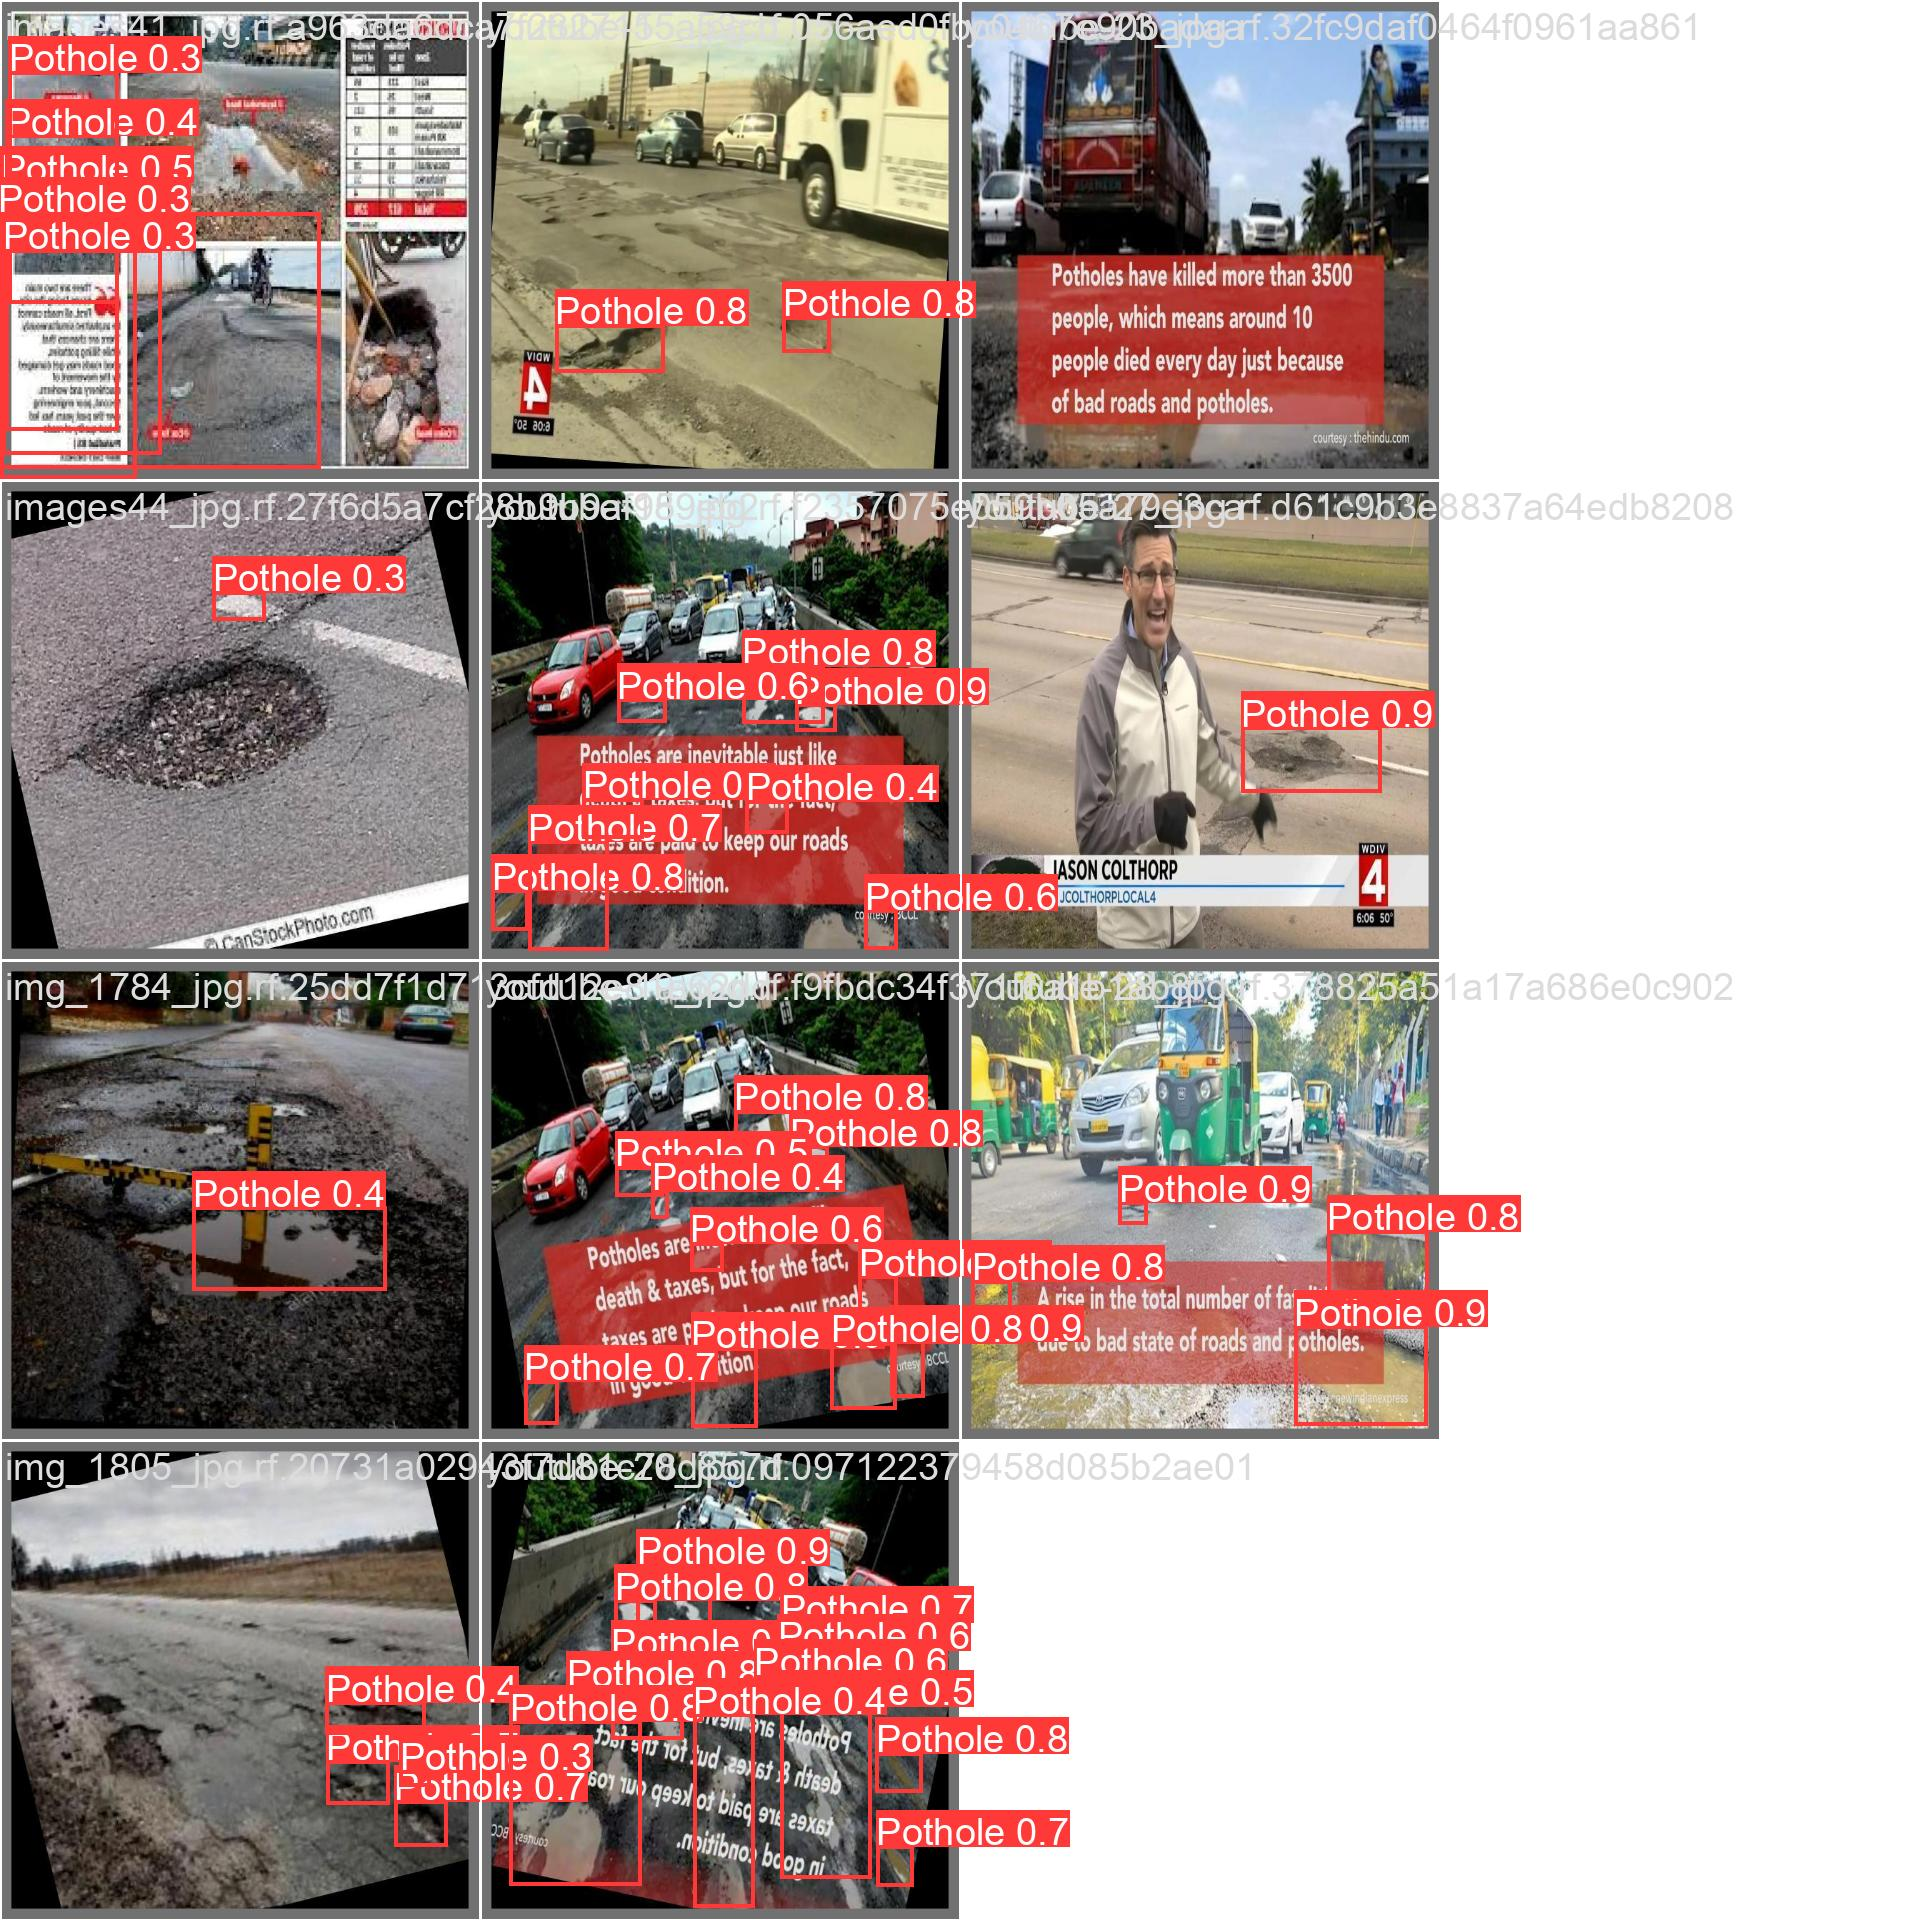

In [ ]:
%cd {HOME}

Image(filename = f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width = 600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/potholedetection/data.yaml

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/potholedetection/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% 11/11 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.03s/it]
                   all         11         44      0.735      0.727      0.732      0.495
Speed: 0.2ms preprocess, 38.8ms inference, 0.0ms loss, 17.5ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/potholedetection/test/images

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/12 /content/drive/MyDrive/potholedetection/test/images/images41_jpg.rf.11026da73060bd1db20f3a83286d480b.jpg: 640x640 2 Potholes, 37.1ms
image 2/12 /content/drive/MyDrive/potholedetection/test/images/images59_jpg.rf.ab0687e6f4bc51f2628866bf797b56d6.jpg: 640x640 (no detections), 37.1ms
image 3/12 /content/drive/MyDrive/potholedetection/test/images/images74_jpg.rf.628b2f6ecbf356138c6f1b67bf7cc490.jpg: 640x640 1 Pothole, 37.1ms
image 4/12 /content/drive/MyDrive/potholedetection/test/images/images96_jpg.rf.1d0dcb3b46980a6f1ebec5c6843943c8.jpg: 640x640 (no detections), 37.1ms
image 5/12 /content/drive/MyDrive/potholedetection/test/images/img_0988_jpg.rf.df15ce39251c1b2c31a7c29f5441c623.jpg: 640x640 2 Potholes, 37.0ms
image 6/12 /content/drive/MyDrive/potholedetection/test/images/img_1797_jpg.rf.83b3958fd7d89

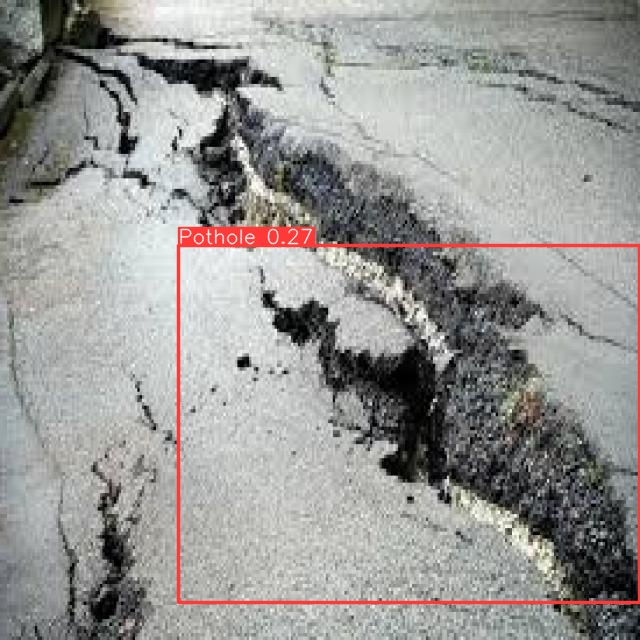

In [ ]:
Image('/content/runs/detect/predict/images74_jpg.rf.628b2f6ecbf356138c6f1b67bf7cc490.jpg')


In [ ]:
%cd {HOME}

!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/demo.mp4'

/content
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 124.8ms
video 1/1 (2/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.8ms
video 1/1 (3/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (4/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 25.7ms
video 1/1 (5/324) /content/drive/MyDrive/demo.mp4: 384x640 (no detections), 25.7ms
video 1/1 (6/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (7/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 25.7ms
video 1/1 (8/324) /content/drive/MyDrive/demo.mp4: 384x640 1 Pothole, 25.7ms
video 1/1 (9/324) /content/drive/MyDrive/demo.mp4: 384x640 3 Potholes, 24.0ms
video 1/1 (10/324) /content/drive/MyDrive/demo.mp4: 384x640 2 Potholes, 18.6ms
video 1/1 (11/324) /content/drive/My

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f"""<video width="640" height="480" controls>
    <source src="{data_url}" type="video/mp4">
</video>""")
